In [11]:
!pip install transformers diffusers accelerate pandas torch --quiet

In [22]:
import pandas as pd
import torch
import warnings
from transformers import pipeline
from diffusers import StableDiffusionPipeline
import os

# ✅ Load & Clean Data
def load_data(filepath):
    df = pd.read_csv(filepath)
    
    # Normalize column names (remove spaces & lowercase them)
    df.columns = df.columns.str.strip().str.lower()

    # Required columns (check case-insensitivity)
    required_cols = {'content', 'hashtags', 'likes', 'retweets', 'replies'}
    existing_cols = set(df.columns)

    # Handle missing engagement columns
    missing_cols = required_cols - existing_cols
    if missing_cols:
        raise ValueError(f"Missing required columns in dataset: {missing_cols}")

    return df

# ✅ Identify Trending Topics
def get_trending_topics(df, top_n=1):
    # Ensure no missing values in engagement metrics
    df[['likes', 'retweets', 'replies']] = df[['likes', 'retweets', 'replies']].fillna(0)

    # Create an engagement score
    df['engagement'] = df['likes'] + df['retweets'] + df['replies']

    # Sort & get top trending posts
    trending = df.sort_values(by='engagement', ascending=False).head(top_n)
    return trending[['content', 'hashtags']]

# ✅ Generate Text Post using GPT-2
def generate_text_post(prompt, model_name="gpt2"):
    try:
        generator = pipeline("text-generation", model=model_name)
        response = generator(prompt, max_length=200, num_return_sequences=1)
        return response[0]['generated_text']
    except Exception as e:
        return f"Error generating text: {e}"

# ✅ Generate Image using Stable Diffusion
def generate_image(prompt, output_path="generated_image.png"):
    try:
        # Load Stable Diffusion model
        sd_pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
        sd_pipeline.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        
        # Generate image
        image = sd_pipeline(prompt).images[0]
        image.save(output_path)

        return output_path
    except Exception as e:
        return f"Error generating image: {e}"

# ✅ Main Execution
def main(filepath):
    df = load_data(filepath)
    trending = get_trending_topics(df)

    for index, row in trending.iterrows():
        text_prompt = f"Write a viral post about {row['content']} with hashtags {row['hashtags']}"
        generated_post = generate_text_post(text_prompt)

        image_prompt = f"Illustration of {row['content']} trending on social media"
        image_path = generate_image(image_prompt, f"trend_{index}.png")

        print(f"\n📢 **Trending Post #{index+1}:**")
        print(generated_post)
        print(f"🖼️ Image saved at: {image_path}")

if __name__ == "__main__":
    filepath = "/kaggle/input/tweetss/tweets.csv"  # Update with your actual file path
    main(filepath)

    
warnings.filterwarnings("ignore")


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


📢 **Trending Post #231:**
Write a viral post about BREAKING Amber Northern Lights alert issued as Brits could spot dazzling night sky display  https://mirror.co.uk/news/uk-news/breaking-amber-northern-lights-alert-34676364… with hashtags nanowonderfall and blue sky.

TESTING FOR BREAKING Amber Northern Lights Alert

MADISON – The Amber Alert has been issued, a local newspaper has reported, to see if anyone is experiencing excessive night sky.

READ MORE: The Amber Central Facebook page is to remain anonymous while this story is investigated

The Amber Alert was issued to find out if anyone has been affected and be advised to contact anyone concerned.

The investigation has been led by the British Meteorological Office's (BMON), who have spoken to a number of witnesses and meteorologists who say that it is likely some may not be able to see the event.

This is very suspicious and the
🖼️ Image saved at: trend_230.png


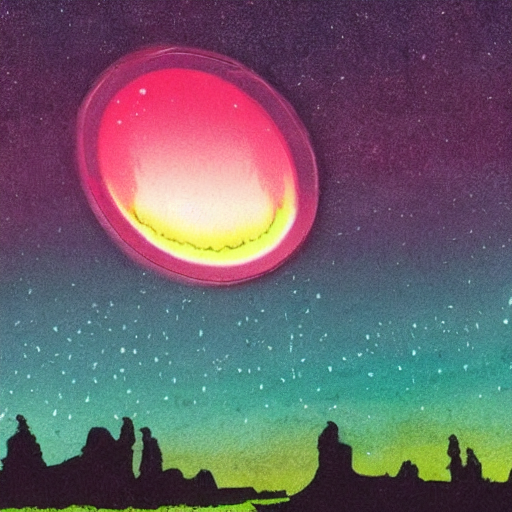

In [23]:
from IPython.display import display
from PIL import Image

# Load images
img1 = Image.open("/kaggle/working/trend_230.png")

# Display images
display(img1)
